# Proyecto

#### Parate de los pasos que vas a realizar para el datacleaning

**Librerias**

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
#ingorar errores
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', 54)#Desplegar columnas para verlas todas

## Carga de datos

In [114]:
df = pd.read_csv('modeling_data.csv', sep=';', low_memory=False)

In [115]:
# las primeras 5 columnas
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [116]:
#dimesión de los datos
df.shape

(50000, 54)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [118]:
#verificar datos nulos
nulos= df.isnull().mean()*100 # en porciento

#Filtar solo los nulos
nulos[nulos>0].index

Index(['RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL.1'],
      dtype='object')

Las columnas con el mayor % deben de ser eliminadas. las demás se deben llenar
- columnas a eliminar: 
```python
['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'] 
```

In [119]:
data = df.drop(['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'], 
              axis=1).copy()

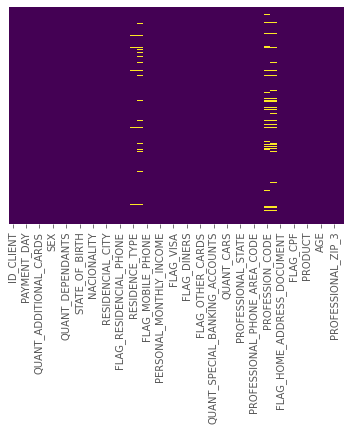

In [120]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

### Revisar columnas

In [121]:
obj_cols = data.select_dtypes('object').columns

In [122]:
data[obj_cols].nunique()

CLERK_TYPE                          1
APPLICATION_SUBMISSION_TYPE         3
SEX                                 4
STATE_OF_BIRTH                     29
CITY_OF_BIRTH                    9910
RESIDENCIAL_STATE                  27
RESIDENCIAL_CITY                 3529
RESIDENCIAL_BOROUGH             14511
FLAG_RESIDENCIAL_PHONE              2
RESIDENCIAL_PHONE_AREA_CODE       102
FLAG_MOBILE_PHONE                   1
COMPANY                             2
PROFESSIONAL_STATE                 28
FLAG_PROFESSIONAL_PHONE             2
PROFESSIONAL_PHONE_AREA_CODE       87
FLAG_ACSP_RECORD                    1
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
dtype: int64

Las columnas que tienen una caracteristica pueden ser eliminadas o no tomadas en consideracion  a hora de seleccionar las variables

por igual la que sobrepasan los 10:
ejemplo-
1. CLERK_TYPE                          
1. STATE_OF_BIRTH                     
1. CITY_OF_BIRTH                    
1. RESIDENCIAL_STATE                  
1. RESIDENCIAL_CITY                
1. RESIDENCIAL_BOROUGH             
1. RESIDENCIAL_PHONE_AREA_CODE       
1. FLAG_MOBILE_PHONE                   
1. PROFESSIONAL_STATE                 
1. PROFESSIONAL_PHONE_AREA_CODE       
1. FLAG_ACSP_RECORD                    
1. RESIDENCIAL_ZIP_3                 
1. PROFESSIONAL_ZIP_3

esas columnas no le portan nada al modelo

In [123]:
data = data.drop(['CLERK_TYPE',   
 'STATE_OF_BIRTH',                    
 'CITY_OF_BIRTH' ,                 
 'RESIDENCIAL_STATE' ,                
 'RESIDENCIAL_CITY' ,              
 'RESIDENCIAL_BOROUGH' ,            
 'RESIDENCIAL_PHONE_AREA_CODE',       
 'FLAG_MOBILE_PHONE',                
 'PROFESSIONAL_STATE',                 
 'PROFESSIONAL_PHONE_AREA_CODE',     
'FLAG_ACSP_RECORD',                    
'RESIDENCIAL_ZIP_3',                 
'PROFESSIONAL_ZIP_3'], axis =1).copy()

In [124]:
num_cols = data.select_dtypes(np.number).columns

In [125]:
data[num_cols].nunique()

ID_CLIENT                         50000
PAYMENT_DAY                           6
QUANT_ADDITIONAL_CARDS                1
POSTAL_ADDRESS_TYPE                   2
MARITAL_STATUS                        8
QUANT_DEPENDANTS                     17
EDUCATION_LEVEL                       1
NACIONALITY                           3
RESIDENCE_TYPE                        6
MONTHS_IN_RESIDENCE                  88
FLAG_EMAIL                            2
PERSONAL_MONTHLY_INCOME            5495
OTHER_INCOMES                       615
FLAG_VISA                             2
FLAG_MASTERCARD                       2
FLAG_DINERS                           2
FLAG_AMERICAN_EXPRESS                 2
FLAG_OTHER_CARDS                      2
QUANT_BANKING_ACCOUNTS                3
QUANT_SPECIAL_BANKING_ACCOUNTS        3
PERSONAL_ASSETS_VALUE               153
QUANT_CARS                            2
MONTHS_IN_THE_JOB                    21
PROFESSION_CODE                      19
OCCUPATION_TYPE                       6


Los datos de las columnas numericas que tienes de 1 los puedes eliminar no aportan al modelo
en total eliminaras 6 columnas
los demas son conocidas como columnas catagorias, tambien binarias ejemplo  
TARGET_LABEL_BAD=1 esta compuesta por 0 = no aplica para el credito 
y 1 = si aplica para el credito 


las demas que sobre pasan las pudes reducir o agrupar todo depende de ti.
lo puedes hacer utilizando la funcion pd.cut() o pd.qcut() o remplazando los valores >= de lo que desees filtar

In [126]:
# Ejemplo
data['FLAG_RG'].value_counts()

0    50000
Name: FLAG_RG, dtype: int64

In [127]:
data['FLAG_RG'].unique()

array([0], dtype=int64)

In [128]:
data = data.drop(['QUANT_ADDITIONAL_CARDS','EDUCATION_LEVEL',  
'FLAG_HOME_ADDRESS_DOCUMENT' ,           
'FLAG_RG' ,                              
'FLAG_CPF' ,                             
'FLAG_INCOME_PROOF' ], axis =1  ).copy()      

In [129]:
data.head()

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,1,5,Web,1,F,6,1,1,Y,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,32,1
1,2,15,Carga,1,F,2,0,1,Y,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,11.0,4.0,1,34,1
2,3,5,Web,1,F,2,0,1,Y,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,11.0,NaN,1,27,0
3,4,20,Web,1,F,2,0,1,N,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,61,0
4,5,10,Web,1,M,2,0,1,Y,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,5.0,1,48,1


In [130]:
data.shape

(50000, 31)

In [131]:
#estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0
POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0
MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0
QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0
NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0
RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0
MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0
FLAG_EMAIL,50000.0,0.802280,0.398284,0.0,1.00,1.0,1.00,1.0
PERSONAL_MONTHLY_INCOME,50000.0,886.678437,7846.959327,60.0,360.00,500.0,800.00,959000.0


In [132]:
#estadisticas columnas objectos
data.describe(include='object').T

,count,unique,top,freq
APPLICATION_SUBMISSION_TYPE,50000,3,Web,28206
SEX,50000,4,F,30805
FLAG_RESIDENCIAL_PHONE,50000,2,Y,41809
COMPANY,50000,2,N,27959
FLAG_PROFESSIONAL_PHONE,50000,2,N,36510


a estas columnas objectos le vas a realizar en onehot encoder

Los pasos que vas a realizar es primero imputar los datos faltantes con simple imputer
luego el onehot encoder lo haces con la funcion make_transformer toma como ejemplo el link del proyecto de deep learning que te envie

## EDA

In [133]:
data.columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'NACIONALITY', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE',
       'TARGET_LABEL_BAD=1'],
      dtype='object')

In [134]:
data['PAYMENT_DAY'].unique()

array([ 5, 15, 20, 10, 25,  1], dtype=int64)

In [135]:
data['POSTAL_ADDRESS_TYPE'].unique()

array([1, 2], dtype=int64)

In [136]:
data.corr()['TARGET_LABEL_BAD=1'].sort_values(ascending =False)[1:]

PAYMENT_DAY                       0.070633
OCCUPATION_TYPE                   0.040216
PRODUCT                           0.019293
RESIDENCE_TYPE                    0.019168
QUANT_DEPENDANTS                  0.012157
QUANT_SPECIAL_BANKING_ACCOUNTS    0.011997
QUANT_BANKING_ACCOUNTS            0.011997
QUANT_CARS                        0.011706
ID_CLIENT                         0.010509
OTHER_INCOMES                     0.004442
PERSONAL_MONTHLY_INCOME           0.002819
FLAG_DINERS                       0.002240
FLAG_OTHER_CARDS                  0.001410
FLAG_AMERICAN_EXPRESS             0.000337
NACIONALITY                      -0.000952
POSTAL_ADDRESS_TYPE              -0.002423
PERSONAL_ASSETS_VALUE            -0.003886
FLAG_VISA                        -0.005398
MONTHS_IN_THE_JOB                -0.007073
FLAG_EMAIL                       -0.008067
PROFESSION_CODE                  -0.011593
FLAG_MASTERCARD                  -0.017658
MONTHS_IN_RESIDENCE              -0.029336
MARITAL_STA

#### Cantidad de dependientes

In [137]:
data['QUANT_DEPENDANTS'].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7, 10,  8, 13, 11,  9, 12, 14, 15, 53],
      dtype=int64)

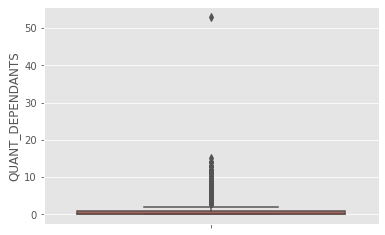

In [138]:
#verificar outlieres
sns.boxplot(y = data['QUANT_DEPENDANTS']);

In [139]:
data.query('QUANT_DEPENDANTS>=14')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
9018,9019,20,0,1,F,1,14,1,N,1.0,40.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,1.0,1,84,1
15065,15066,5,Web,1,F,2,14,1,Y,1.0,0.0,1,521.0,0.0,1,1,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,48,0
19449,19450,10,0,1,F,4,15,1,N,1.0,20.0,1,308.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,65,0
27904,27905,10,Web,1,F,2,14,1,Y,1.0,NaN,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,1.0,1,62,0
40462,40463,20,0,1,F,2,53,1,Y,1.0,20.0,1,600.0,0.0,0,0,0,0,0,1,1,0.0,0,N,N,0,9.0,2.0,1,48,0


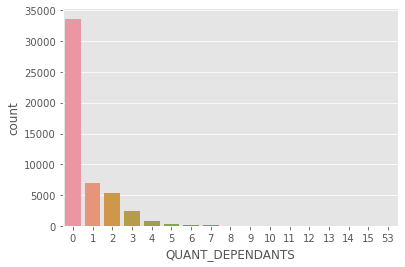

In [140]:
sns.countplot(data['QUANT_DEPENDANTS']);

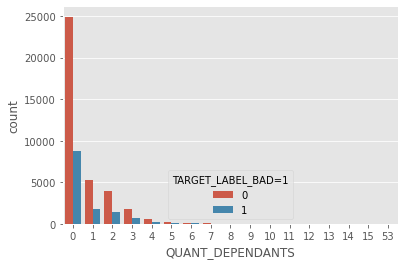

In [141]:
sns.countplot(data['QUANT_DEPENDANTS'], hue=data['TARGET_LABEL_BAD=1']);

**comentario**
- Se debe de reducir a si o no, dede si es todos los registros >=1 

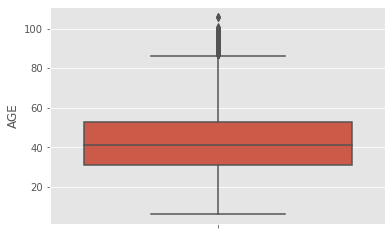

In [142]:
#verificar outlieres
sns.boxplot(y = data['AGE']);

In [143]:
data.query('AGE>=82')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
62,63,25,0,1,F,1,0,1,N,1.0,5.0,0,422.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,0.0,1.0,1,84,1
104,105,5,Web,1,M,2,0,1,N,1.0,10.0,1,1530.79,0.0,1,0,0,0,0,1,1,0.0,0,N,N,0,9.0,1.0,1,92,1
133,134,5,Web,1,F,4,0,1,N,1.0,5.0,1,1240.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,91,1
256,257,10,0,1,F,4,0,1,N,1.0,10.0,0,450.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,1.0,1,91,1
588,589,5,0,1,F,2,0,1,Y,1.0,NaN,1,2355.00,0.0,0,0,0,0,0,1,1,0.0,0,Y,N,0,11.0,1.0,1,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49290,49291,1,0,1,M,2,0,1,N,1.0,45.0,0,350.00,0.0,0,0,0,0,0,1,1,0.0,1,Y,N,0,9.0,1.0,1,82,1
49316,49317,10,Web,1,F,4,0,2,Y,1.0,13.0,1,900.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,NaN,NaN,1,83,0
49365,49366,10,Web,1,F,4,0,1,Y,1.0,24.0,1,493.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,82,0
49420,49421,10,Web,1,F,4,0,1,Y,1.0,1.0,1,357.35,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,1.0,1,86,0


In [144]:
data['AGE'].describe()

count    50000.00000
mean        43.24852
std         14.98905
min          6.00000
25%         31.00000
50%         41.00000
75%         53.00000
max        106.00000
Name: AGE, dtype: float64

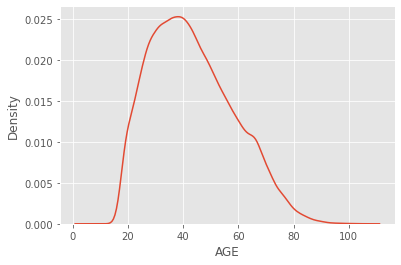

In [145]:
sns.kdeplot(data['AGE']);

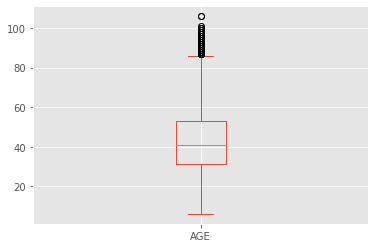

In [146]:
data['AGE'].plot(kind='box');

In [147]:
data.query('AGE<=17')

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
2449,2450,1,0,1,F,1,1,1,Y,1.0,18.0,0,700.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,2.0,4.0,1,17,0
3103,3104,10,Web,1,F,1,0,1,Y,1.0,1.0,1,380.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,11.0,5.0,2,17,1
5456,5457,5,Carga,1,M,1,0,1,Y,1.0,1.0,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,2.0,1,17,0
5529,5530,5,0,1,M,2,0,1,Y,1.0,NaN,1,361.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,17,0
8384,8385,10,Web,1,F,1,0,1,N,5.0,1.0,1,350.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,17,0
11305,11306,15,Carga,1,F,1,0,1,Y,1.0,1.0,1,350.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,11.0,5.0,2,17,0
11860,11861,20,Web,1,M,2,0,1,Y,1.0,1.0,1,440.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,1.0,2,17,1
13158,13159,10,Web,1,F,1,0,1,Y,1.0,19.0,1,384.00,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,2.0,1,17,1
14500,14501,5,0,1,M,1,0,1,Y,1.0,2.0,1,400.00,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0,9.0,2.0,1,17,0
18155,18156,25,Web,1,F,1,0,1,Y,1.0,6.0,1,406.78,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,0,9.0,2.0,1,17,1


Reducir la data tiene outliers personas por debajo de ser amyor de edad y personas que tienen mas de 106 años que aplicaraon para prestamos

In [148]:
#filtro selecciona solo los registros que cumplen con la condicion de la edad 
df1 = data.query('AGE>=18 & AGE <=80')

In [149]:
df1.shape

(49540, 31)

In [150]:
df1.shape

(49540, 31)

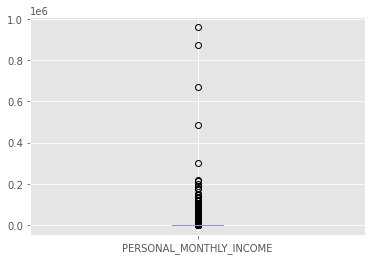

In [151]:
df1['PERSONAL_MONTHLY_INCOME'].plot(kind='box');

#### INGRESOS

In [152]:
df1['PERSONAL_MONTHLY_INCOME'].describe()

count     49540.000000
mean        889.443646
std        7882.823700
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

In [153]:
df1.query('PERSONAL_MONTHLY_INCOME<=100').head()

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
1039,1040,25,Web,1,F,2,1,1,N,1.0,38.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,2.0,4.0,1,53,0
3891,3892,25,Carga,1,F,1,1,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,11.0,4.0,1,33,0
7894,7895,25,Carga,1,F,1,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,57,0
8445,8446,10,Carga,1,F,1,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,4.0,1,36,0
9771,9772,15,Web,1,M,2,0,1,Y,1.0,1.0,1,100.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,9.0,4.0,2,42,0


In [154]:
df1['OTHER_INCOMES'].describe()

count     49540.000000
mean         35.509507
std         895.558440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      194344.000000
Name: OTHER_INCOMES, dtype: float64

**Comentario**
- crear una columna nueva total income

## PRODUCT

In [155]:
df1['PRODUCT'].value_counts()

1    42296
2     5959
7     1285
Name: PRODUCT, dtype: int64

**Comentario** si se pude convertir a string o categorica por ejemplo se convierte string a categoricas para que coja el valor de 0,1,2 ect ver mas abajo

In [156]:
#ejemplo 
#primero la cnverti en categorica luego las estoy convirtiendo en automatico a numericas binarias 0,1,2

df1["PRODUCT"]= df1["PRODUCT"].astype('category').cat.codes

In [157]:

df1["PRODUCT"].value_counts()

0    42296
1     5959
2     1285
Name: PRODUCT, dtype: int64

Cuando te dicen cambiarla a string es para cuando realices el ONEHOT ENCODING como son muchas columnas de este tipo por eso se utiliza el onehot tome el valor de
0    42296
1     5959
2     1285

#otro metodo es este de abajo que realiza los mismo la desventaja es que lo debes de hacer columna por columna
```python
df1["PRODUCT"].astype('category').cat.codes
```

In [158]:
df1.head(2)

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,1,5,Web,1,F,6,1,1,Y,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,0,32,1
1,2,15,Carga,1,F,2,0,1,Y,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,11.0,4.0,0,34,1


In [159]:
df1['PERSONAL_ASSETS_VALUE'].describe()

count    4.954000e+04
mean     2.324286e+03
std      4.253722e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.000000e+06
Name: PERSONAL_ASSETS_VALUE, dtype: float64

In [160]:
df1['APPLICATION_SUBMISSION_TYPE'].unique()

array(['Web', 'Carga', '0'], dtype=object)

In [161]:
['ID_CLIENT', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'POSTAL_ADDRESS_TYPE',  'NACIONALITY', 'FLAG_RESIDENCIAL_PHONE', 'FLAG_RESIDENCIAL_PHONE','PROFESSION_CODE', 
 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE' 'FLAG_EMAIL', 'PERSONAL_ASSETS_VALUE','OCCUPATION_TYPE', 'MONTHS_IN_THE_JOB', 'FLAG_PROFESSIONAL_PHONE']

['ID_CLIENT',
 'PAYMENT_DAY',
 'APPLICATION_SUBMISSION_TYPE',
 'POSTAL_ADDRESS_TYPE',
 'NACIONALITY',
 'FLAG_RESIDENCIAL_PHONE',
 'FLAG_RESIDENCIAL_PHONE',
 'PROFESSION_CODE',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCEFLAG_EMAIL',
 'PERSONAL_ASSETS_VALUE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_THE_JOB',
 'FLAG_PROFESSIONAL_PHONE']

In [162]:
df1['SEX'].mode()

0    F
Name: SEX, dtype: object

In [163]:
df1['SEX'].value_counts()

F    30531
M    18945
N       47
        17
Name: SEX, dtype: int64

In [164]:
df2 = df1.drop(['ID_CLIENT',
 'PAYMENT_DAY',
 'APPLICATION_SUBMISSION_TYPE',
 'POSTAL_ADDRESS_TYPE',
 'NACIONALITY',
 'FLAG_RESIDENCIAL_PHONE',
 'FLAG_RESIDENCIAL_PHONE',
 'PROFESSION_CODE',
 'RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE','FLAG_EMAIL',
 'PERSONAL_ASSETS_VALUE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_THE_JOB'], axis =1)

In [165]:
df2['SEX'] = df2['SEX'].str.replace(' ', 'F')

In [166]:
df2['SEX'].value_counts()

F    30548
M    18945
N       47
Name: SEX, dtype: int64

### contenido de las columnas objectos

In [167]:
df2['QUANT_DEPENDANTS'].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7, 10,  8, 13, 11,  9, 12, 14, 15, 53],
      dtype=int64)

In [168]:
#df3= df2.copy()

In [169]:
df2['QUANT_DEPENDANTS'] = np.where(df2['QUANT_DEPENDANTS']>=1, 1,0)

In [170]:
df2['QUANT_DEPENDANTS'].unique()

array([1, 0])

In [171]:
df2['QUANT_DEPENDANTS'].value_counts()

0    33274
1    16266
Name: QUANT_DEPENDANTS, dtype: int64

In [172]:
#creo la variable para extrae las columnas que son de tipo objectos
obj= df2.select_dtypes('object').columns

#este for sirve para iteractuar por las columnas e imprimirlas una a una
for i in df2[obj]:
    print (i ,':', df2[i].unique())

SEX : ['F' 'M' 'N']
COMPANY : ['N' 'Y']
FLAG_PROFESSIONAL_PHONE : ['N' 'Y']


In [173]:
sex_dic = {'F':0, 'M':1, 'N':2}
y_n_dic = {'N':0 ,'Y':1} # este diccionario se va a utilizar tanto para las columnas company y flag pro

In [174]:
#convertir las columnas objectos a numericas

df2['SEX']= df2['SEX'].map(sex_dic)
df2['COMPANY']= df2['COMPANY'].map(y_n_dic)
df2['FLAG_PROFESSIONAL_PHONE'] = df2['FLAG_PROFESSIONAL_PHONE'].map(y_n_dic)

## a la parte de crear columna se le llama  Feature Engeneering

In [175]:
df2['TOTAL_INCOME'] = df2['PERSONAL_MONTHLY_INCOME'] + df2['OTHER_INCOMES']
df2.head(2)

,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1,TOTAL_INCOME
0,0,6,1,900.0,0.0,1,1,0,0,0,0,0,0,0,0,0,32,1,900.0
1,0,2,0,750.0,0.0,0,0,0,0,0,0,0,0,1,0,0,34,1,750.0


In [176]:
df2.drop(['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES'], axis =1, inplace=True)

In [177]:
df2.shape

(49540, 17)

In [178]:
df2.head(2)

,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1,TOTAL_INCOME
0,0,6,1,1,1,0,0,0,0,0,0,0,0,0,32,1,900.0
1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,34,1,750.0


In [179]:
# save data 
df2.to_csv('data_clean.csv', index = False)

## Dividir  X, y

In [180]:
df2.columns

Index(['SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1',
       'TOTAL_INCOME'],
      dtype='object')

In [181]:
FEATURES = ['SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'PRODUCT', 'AGE', 
       'TOTAL_INCOME']

TARGET = ['TARGET_LABEL_BAD=1']

In [217]:
X = df2[FEATURES]
y = df2[TARGET]
X.shape, y.shape

((49540, 16), (49540, 1))

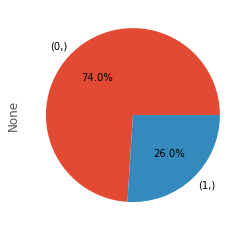

In [218]:
y.value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [219]:
y.value_counts()

TARGET_LABEL_BAD=1
0                     36655
1                     12885
dtype: int64

**Nota**
- Las clases de este conjunto de datos esta desbalanceados


### split into train and testing set

In [185]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123,stratify=y)

### Normalizar los datos

In [187]:
from sklearn.preprocessing import StandardScaler

In [221]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Build Model

###  Linear Classifier

In [189]:
from sklearn.linear_model import LogisticRegression

In [222]:
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr.fit(X_train_sc, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

In [223]:
y_lr = lr.predict(X_test_sc)

#### Scores

In [194]:
from sklearn import metrics

In [224]:
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7331
           1       0.00      0.00      0.00      2577

    accuracy                           0.74      9908
   macro avg       0.37      0.50      0.43      9908
weighted avg       0.55      0.74      0.63      9908



**Comentario**
- Podemos no esta prediciendo los datos de la clase 1

### Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state =42)
rf.fit(X_train_sc, y_train)
y_rf = rf.predict(X_test_sc)

In [226]:
print(metrics.classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      7331
           1       0.32      0.16      0.21      2577

    accuracy                           0.69      9908
   macro avg       0.53      0.52      0.51      9908
weighted avg       0.64      0.69      0.65      9908



- El modelo RF reconoce la clase.
- tiene un bajo porcentaje de precision 69%  

en vista que los dos modelos baja precision para determinar las clases vamos a utilizar, metodos para balancer las clases del dataset

## Balancear las clases

In [227]:
from imblearn.under_sampling import RandomUnderSampler

In [228]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_sc, y_train)

In [229]:
y_rus.value_counts()

TARGET_LABEL_BAD=1
0                     10308
1                     10308
dtype: int64

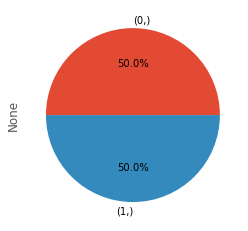

In [230]:
y_rus.value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

#### Modelos

In [231]:
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr.fit(X_rus, y_rus)
y_lr = lr.predict(X_test_sc)
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.53      0.63      7331
           1       0.31      0.61      0.41      2577

    accuracy                           0.55      9908
   macro avg       0.55      0.57      0.52      9908
weighted avg       0.67      0.55      0.58      9908



In [232]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state =42)
rf.fit(X_rus, y_rus)
y_rf = rf.predict(X_test_sc)
print(metrics.classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.77      0.53      0.63      7331
           1       0.29      0.55      0.38      2577

    accuracy                           0.54      9908
   macro avg       0.53      0.54      0.50      9908
weighted avg       0.65      0.54      0.56      9908



## Oversampling

In [233]:
from imblearn.over_sampling import SMOTE

In [240]:
os = SMOTE()
X_os , y_os = os.fit_resample(X_train_sc, y_train)

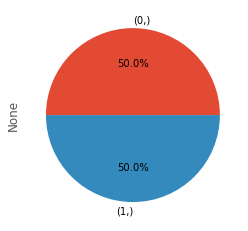

In [241]:
y_os.value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [242]:
y_os.value_counts()

TARGET_LABEL_BAD=1
0                     29324
1                     29324
dtype: int64

In [243]:
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr.fit(X_os, y_os)
y_lr = lr.predict(X_test_sc)
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64      7331
           1       0.31      0.60      0.41      2577

    accuracy                           0.55      9908
   macro avg       0.55      0.57      0.52      9908
weighted avg       0.67      0.55      0.58      9908



In [244]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state =42)
rf.fit(X_os, y_os)
y_rf = rf.predict(X_test_sc)
print(metrics.classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7331
           1       0.29      0.32      0.31      2577

    accuracy                           0.62      9908
   macro avg       0.52      0.52      0.52      9908
weighted avg       0.63      0.62      0.63      9908



### Estrategia: Combinamos resampling con Smote-Tomek

In [239]:
from imblearn.combine import SMOTETomek

In [245]:
os_us = SMOTETomek()
X_train_os_us, y_train_os_us = os_us.fit_resample(X_train_sc, y_train)

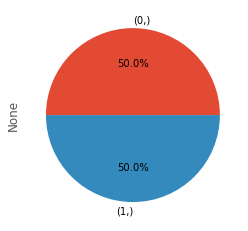

In [246]:
y_train_os_us.value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [247]:
y_train_os_us.value_counts()

TARGET_LABEL_BAD=1
0                     24903
1                     24903
dtype: int64

In [248]:
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr.fit(X_train_os_us, y_train_os_us)
y_lr = lr.predict(X_test_sc)
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64      7331
           1       0.31      0.61      0.41      2577

    accuracy                           0.55      9908
   macro avg       0.55      0.57      0.52      9908
weighted avg       0.67      0.55      0.58      9908



In [249]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state =42)
rf.fit(X_train_os_us, y_train_os_us)
y_rf = rf.predict(X_test_sc)
print(metrics.classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7331
           1       0.30      0.33      0.31      2577

    accuracy                           0.62      9908
   macro avg       0.53      0.53      0.53      9908
weighted avg       0.64      0.62      0.63      9908



**Comentario**
- como podemos observar el modelo mejoro sus performace en todos los sentidos  

Una reecomendación importante seria:
- Mejorar la calidad de la data realizando una mejor limpieza de la data.
- seleccionar las mejores 10 0 15 carasteristicas utilizando un método ya sea chi2 o Keep the best

## Seleccionar las mejores caracteristicas

In [281]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [304]:
test = SelectKBest(score_func=chi2, k = 10).fit(X_train, y_train)#k= _caracteristic

In [305]:
mask = test.get_support() #list of booleans for selected features

new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
     if bool:
            new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 8 best features

The best features are:['SEX', 'MARITAL_STATUS', 'FLAG_MASTERCARD', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'FLAG_PROFESSIONAL_PHONE', 'PRODUCT', 'AGE', 'TOTAL_INCOME']


In [307]:
new_feat

['SEX',
 'MARITAL_STATUS',
 'FLAG_MASTERCARD',
 'QUANT_BANKING_ACCOUNTS',
 'QUANT_SPECIAL_BANKING_ACCOUNTS',
 'QUANT_CARS',
 'FLAG_PROFESSIONAL_PHONE',
 'PRODUCT',
 'AGE',
 'TOTAL_INCOME']

#### Modelos con la mejor carcteristicas

In [315]:
X_train_new = X_train[new_feat]
X_test_new = X_test[new_feat]

In [316]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_new, y_train)

In [317]:
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
lr.fit(X_rus, y_rus)
y_lr = lr.predict(X_test_new)
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      7281
           1       0.31      0.60      0.41      2627

    accuracy                           0.54      9908
   macro avg       0.55      0.56      0.52      9908
weighted avg       0.66      0.54      0.57      9908

